<a href="https://colab.research.google.com/github/SHAIKHHUZEFA/basic-django-project/blob/master/Bagging_and_Boosting%20in%20irir%20data%20set.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
data.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [0]:
features = data.iloc[:,:-1].values
label = data.iloc[:,-1].values

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state=10)

In [0]:
#Model -- LogisticRegression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.95
0.9


In [0]:
#Bagging 
# BaggingClassifier
# BaggingRegressor --- Homework
model1 = LogisticRegression()
from sklearn.ensemble import BaggingClassifier
bagClassifier = BaggingClassifier(base_estimator=model1, #Algo object to be performed(LogisticRegression)
                                 n_estimators=101)

In [0]:
print(bagclassifier.score(X_train,Y_train))

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=101, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [0]:
print(bagClassifier.score(X_train,y_train))
print(bagClassifier.score(X_test,y_test))

0.95
0.9


In [0]:
from mlxtend.plotting import plot_decision_regions

In [0]:
model2 = LogisticRegression()
model2.fit(X_train[:,0:2],finalLabels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [0]:
dataLabels = pd.DataFrame(y_train).replace(['setosa','versicolor','virginica'],[1,2,3])

In [0]:
finalLabels = dataLabels.values.ravel()

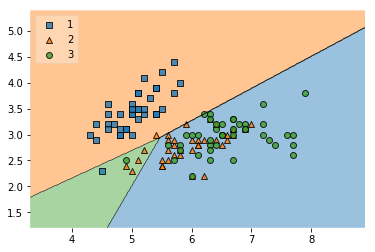

In [0]:
plot_decision_regions(X_train[:,0:2], finalLabels, clf=model2, legend=2)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=9)
modelKNN.fit(X_train[:,0:2],finalLabels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

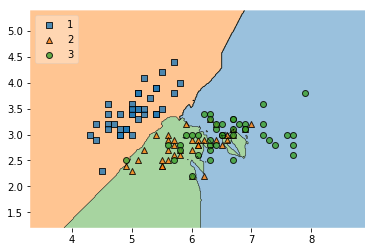

In [0]:
plot_decision_regions(X_train[:,0:2], finalLabels, clf=modelKNN, legend=2)

In [0]:
dataLabels1 = pd.DataFrame(y_test).replace(['setosa','versicolor','virginica'],[1,2,3])
finaltestLabels = dataLabels1.values.ravel()

In [0]:
print(modelKNN.score(X_train[:,0:2],finalLabels))
print(modelKNN.score(X_test[:,0:2],finaltestLabels))

0.7916666666666666
0.8


In [0]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

# Boosting Example

In [0]:

from sklearn.ensemble import AdaBoostClassifier
modelForBoost = LogisticRegression()
boostAlgo = AdaBoostClassifier(base_estimator=modelForBoost,
                              n_estimators=101)

In [0]:
boostAlgo.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          learning_rate=1.0, n_estimators=101, random_state=None)

In [0]:
print(boostAlgo.score(X_train,y_train))
print(boostAlgo.score(X_test,y_test))

0.6416666666666667
0.7666666666666667
